# US Alcohol Sales

In [1]:
#import all of your modules

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#read in local csv file and create dataframe; I've named it 'df' to keep it simple

df = pd.read_csv('Data-Table1.csv')

print(df)

      Year  Month  FIPS  Beverage    Gallons  Ethanol  Population  PerCapita  \
0     2017      1     2         1   103645.0    42598      594304     0.0717   
1     2017      1     8         1   733857.0   301615     4639112     0.0650   
2     2017      1     9         1   412100.0   169373     3017061     0.0561   
3     2017      1    10         1   180388.0    74139      800398     0.0926   
4     2017      1    12         1  2770686.0  1138752    17733837     0.0642   
...    ...    ...   ...       ...        ...      ...         ...        ...   
2907  2021      8    27         4        NaN  1248935     4652447     0.2684   
2908  2021      8    29         4        NaN  1212586     5093948     0.2380   
2909  2021      8    38         4        NaN   187757      620677     0.3025   
2910  2021      8    47         4        NaN  1173051     5718921     0.2051   
2911  2021      8    48         4        NaN  4585911    23608900     0.1942   

      PerCapita3yr  PctChange  
0      

In [3]:
# run the pandas.DataFrame.head to get a quick idea of what it looks like

df.head()

   Year  Month  FIPS  Beverage    Gallons  Ethanol  Population  PerCapita  \
0  2017      1     2         1   103645.0    42598      594304     0.0717   
1  2017      1     8         1   733857.0   301615     4639112     0.0650   
2  2017      1     9         1   412100.0   169373     3017061     0.0561   
3  2017      1    10         1   180388.0    74139      800398     0.0926   
4  2017      1    12         1  2770686.0  1138752    17733837     0.0642   

   PerCapita3yr  PctChange  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  


In [4]:
# looking at type verifies that we have indeed created a DataFrame

print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
# Let's print the data types of the columns in the data set

print(df.dtypes)

Year              int64
Month             int64
FIPS              int64
Beverage          int64
Gallons         float64
Ethanol           int64
Population        int64
PerCapita       float64
PerCapita3yr    float64
PctChange       float64
dtype: object


# Data Clean Up 

In [6]:
# We can sort out the rows for the years that we want to focus on, 2019 - 2021, using the 
# pandas.DataFrame.isin method

df = df[~df['Year'].isin([2017, 2018])]
print(df)

      Year  Month  FIPS  Beverage    Gallons  Ethanol  Population  PerCapita  \
1248  2019      1     2         1   112835.0    46375      591039     0.0785   
1249  2019      1     8         1   889500.0   365585     4791946     0.0763   
1250  2019      1     9         1   614817.0   252690     3019599     0.0837   
1251  2019      1    10         1   210789.0    86634      818920     0.1058   
1252  2019      1    12         1  3281500.0  1348697    18218901     0.0740   
...    ...    ...   ...       ...        ...      ...         ...        ...   
2907  2021      8    27         4        NaN  1248935     4652447     0.2684   
2908  2021      8    29         4        NaN  1212586     5093948     0.2380   
2909  2021      8    38         4        NaN   187757      620677     0.3025   
2910  2021      8    47         4        NaN  1173051     5718921     0.2051   
2911  2021      8    48         4        NaN  4585911    23608900     0.1942   

      PerCapita3yr  PctChange  
1248   

In [7]:
# the last two columns are mostly empty of data so they can be dropped using the pandas.DataFrame.drop method
# I've left most of the columns for future use just in case

to_drop = ['PerCapita3yr',
          'PctChange']

df.drop(to_drop, inplace=True, axis=1)
print(df.head())

      Year  Month  FIPS  Beverage    Gallons  Ethanol  Population  PerCapita
1248  2019      1     2         1   112835.0    46375      591039     0.0785
1249  2019      1     8         1   889500.0   365585     4791946     0.0763
1250  2019      1     9         1   614817.0   252690     3019599     0.0837
1251  2019      1    10         1   210789.0    86634      818920     0.1058
1252  2019      1    12         1  3281500.0  1348697    18218901     0.0740


In [8]:
# some of the rows have null entries and can be dropped as well

df.dropna(inplace=True)
print(df)

      Year  Month  FIPS  Beverage     Gallons  Ethanol  Population  PerCapita
1248  2019      1     2         1    112835.0    46375      591039     0.0785
1249  2019      1     8         1    889500.0   365585     4791946     0.0763
1250  2019      1     9         1    614817.0   252690     3019599     0.0837
1251  2019      1    10         1    210789.0    86634      818920     0.1058
1252  2019      1    12         1   3281500.0  1348697    18218901     0.0740
...    ...    ...   ...       ...         ...      ...         ...        ...
2894  2021      8    27         3  10841848.0   487883     4652447     0.1049
2895  2021      8    29         3  11128509.0   500783     5093948     0.0983
2896  2021      8    38         3   2069134.0    93111      620677     0.1500
2897  2021      8    47         3  11625691.0   523156     5718921     0.0915
2898  2021      8    48         3  58112092.0  2615044    23608900     0.1108

[1248 rows x 8 columns]


In [9]:
# Rename FIPS column to State, so that it's more clear. In the original file, FIPS is the Geographic ID code.

df.rename(columns={"FIPS" : "State"}, inplace=True)
print(df)

      Year  Month  State  Beverage     Gallons  Ethanol  Population  PerCapita
1248  2019      1      2         1    112835.0    46375      591039     0.0785
1249  2019      1      8         1    889500.0   365585     4791946     0.0763
1250  2019      1      9         1    614817.0   252690     3019599     0.0837
1251  2019      1     10         1    210789.0    86634      818920     0.1058
1252  2019      1     12         1   3281500.0  1348697    18218901     0.0740
...    ...    ...    ...       ...         ...      ...         ...        ...
2894  2021      8     27         3  10841848.0   487883     4652447     0.1049
2895  2021      8     29         3  11128509.0   500783     5093948     0.0983
2896  2021      8     38         3   2069134.0    93111      620677     0.1500
2897  2021      8     47         3  11625691.0   523156     5718921     0.0915
2898  2021      8     48         3  58112092.0  2615044    23608900     0.1108

[1248 rows x 8 columns]


In [10]:
# Let's convert Gallons into an integer, so it's easier to use that data in the future. The column was designated 
# as a float type since there were rows that had null entries

df['Gallons'] = df['Gallons'].round().astype('int64')
print(df.dtypes)

Year            int64
Month           int64
State           int64
Beverage        int64
Gallons         int64
Ethanol         int64
Population      int64
PerCapita     float64
dtype: object


In [11]:
# we also don't need the state or beverage as integers, so let's convert those to a string

df['State'] = df['State'].astype('str')

df['Beverage'] = df['Beverage'].astype('str')

print(df.dtypes)

Year            int64
Month           int64
State          object
Beverage       object
Gallons         int64
Ethanol         int64
Population      int64
PerCapita     float64
dtype: object


In [12]:
# These are lists for the State and Beverage columns, that are included in the Assets/ folder 
# in the Definitions.csv file

statelist = ['Alaska','Colorado','Connecticut','Delaware','Florida','Illinois','Kentucky',
             'Massachusetts','Minnesota','Missouri','North Dakota','Tennessee','Texas' ]
print(statelist)

['Alaska', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Illinois', 'Kentucky', 'Massachusetts', 'Minnesota', 'Missouri', 'North Dakota', 'Tennessee', 'Texas']


In [13]:
alclist = ['spirits','wine','beer']

print(alclist)

['spirits', 'wine', 'beer']


In [14]:
#for ease of use, since we've changed those columns to strings, we can go ahead and also change the 
#data in those columns and replace the numbers

df['Beverage'] = df['Beverage'].replace(['1', '2', '3'], ['spirits', 'wine', 'beer'])
df['State'] = df['State'].replace(['2','8','9','10','12','17','21','25','27','29','38','47','48'], 
                                  ['Alaska','Colorado','Connecticut','Delaware','Florida','Illinois',
                                   'Kentucky','Massachusetts','Minnesota','Missouri','North Dakota',
                                   'Tennessee','Texas'])
df.head


<bound method NDFrame.head of       Year  Month         State Beverage   Gallons  Ethanol  Population  \
1248  2019      1        Alaska  spirits    112835    46375      591039   
1249  2019      1      Colorado  spirits    889500   365585     4791946   
1250  2019      1   Connecticut  spirits    614817   252690     3019599   
1251  2019      1      Delaware  spirits    210789    86634      818920   
1252  2019      1       Florida  spirits   3281500  1348697    18218901   
...    ...    ...           ...      ...       ...      ...         ...   
2894  2021      8     Minnesota     beer  10841848   487883     4652447   
2895  2021      8      Missouri     beer  11128509   500783     5093948   
2896  2021      8  North Dakota     beer   2069134    93111      620677   
2897  2021      8     Tennessee     beer  11625691   523156     5718921   
2898  2021      8         Texas     beer  58112092  2615044    23608900   

      PerCapita  
1248     0.0785  
1249     0.0763  
1250     0.0837

# Data Analysis 

In [15]:
# function to see total amount of gallons sold between years of 2019 - 2021

totalgallons = df['Gallons'].sum()
print('The total gallons of alcohol sold between the years of 2019 - 2021 is', totalgallons)


The total gallons of alcohol sold between the years of 2019 - 2021 is 7013589746


In [16]:
#function to see total amount of gallons sold, filtered by year
print('Enter year (2019 through 2021):')
useryear = int(input()) 
gallonsyear = df.loc[df['Year'] == useryear, 'Gallons'].sum()
print('The total gallons of alcohol sold in', useryear, 'is', gallonsyear)

Enter year (2019 through 2021):
2019
The total gallons of alcohol sold in 2019 is 2584832285


In [17]:
# function to see total amount of gallons sold, filtered by state
print(statelist)
print('Enter state:' )
userstate = input()
stategallons = df.loc[df['State'] == userstate, 'Gallons'].sum()
print('The total gallons of alcohol sold in this state is', stategallons)

['Alaska', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Illinois', 'Kentucky', 'Massachusetts', 'Minnesota', 'Missouri', 'North Dakota', 'Tennessee', 'Texas']
Enter state:
North Dakota
The total gallons of alcohol sold in this state is 65362053


In [18]:
# function to see total amount of gallons sold, filtered by type of beverage
print(alclist)
print('Enter beverage:' )
userbev = input()
bevtotal = df.loc[df['Beverage'] == userbev, 'Gallons'].sum()
print('The total gallons of', userbev, 'sold is', bevtotal)


['spirits', 'wine', 'beer']
Enter beverage:
wine
The total gallons of wine sold is 802871637


In [19]:
# function to see total amount of gallons sold, filtered by year, state and type of beverage;
#please refer to statelist and alclist  

def alcsales():
    print('Enter year (2019 through 2021):')
    useryear2 = int(input())

    print('Enter state:')
    userstate2 = input()

    print('Enter beverage:')
    userbev2 = input()
    
    gallonsfilt = df.loc[(df['Year'] == useryear2) & (df['State'] == userstate2) & (df['Beverage'] == userbev2),
                    'Gallons'].sum()

    print(gallonsfilt)

alcsales()

Enter year (2019 through 2021):
2019
Enter state:
Florida
Enter beverage:
wine
79433838


In [20]:
#function to find average gallons sold per year
 
gallonavg = df.groupby('Year')['Gallons'].mean()

print(gallonavg)


Year
2019    5.523146e+06
2020    5.612396e+06
2021    5.776141e+06
Name: Gallons, dtype: float64


In [24]:
#function to find average gallons sold per type of beverage

beverageavg = df.groupby('Beverage')['Gallons'].mean()

print(beverageavg)

Beverage
beer       1.352370e+07
spirits    1.405914e+06
wine       1.929980e+06
Name: Gallons, dtype: float64


In [26]:
#function to find average gallons sold per state

stateavg = df.groupby('State')['Gallons'].mean()

print(stateavg)

State
Alaska           5.056075e+05
Colorado         4.381886e+06
Connecticut      2.092087e+06
Delaware         8.201629e+05
Florida          1.560863e+07
Illinois         8.555766e+06
Kentucky         2.520233e+06
Massachusetts    4.407603e+06
Minnesota        4.098061e+06
Missouri         4.277848e+06
North Dakota     6.808547e+05
Tennessee        4.268378e+06
Texas            2.084111e+07
Name: Gallons, dtype: float64


In [54]:
#expression for Gallons per capita

gallonpercap = df['Gallons'] * df['PerCapita']

print(gallonpercap)

1248    8.857548e+03
1249    6.786885e+04
1250    5.146018e+04
1251    2.230148e+04
1252    2.428310e+05
            ...     
2894    1.137310e+06
2895    1.093932e+06
2896    3.103701e+05
2897    1.063751e+06
2898    6.438820e+06
Length: 1248, dtype: float64


In [57]:
#expression for smallest value of Gallons

gallonmin = df['Gallons'].min()

print(gallonmin)

61255


In [56]:
#xpressions for median value of Gallons

gallonmedian = df['Gallons'].median()

print(gallonmedian)

1552672.5


# Graphs 

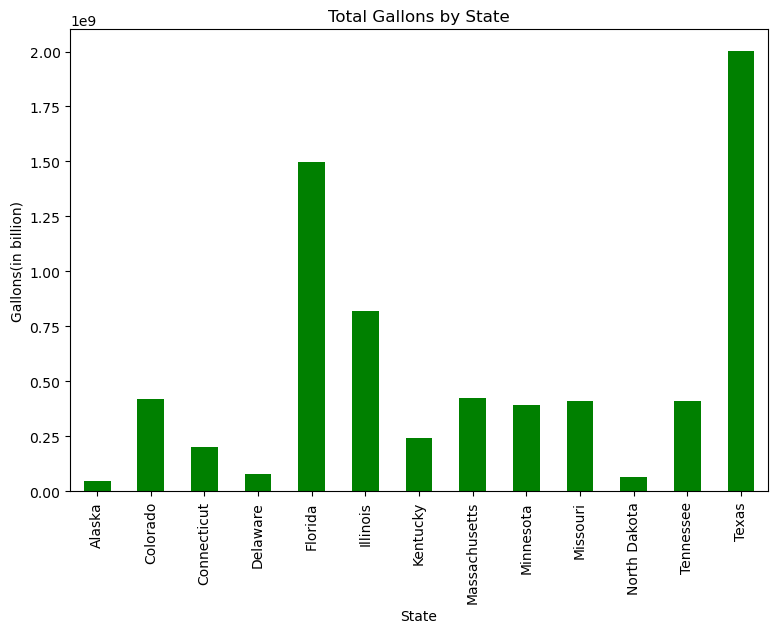

In [27]:
# bar graph for total gallons sold in each state

plt = df.groupby(['State'])['Gallons'].sum()
plt.plot(kind='bar', title='Total Gallons by State', ylabel='Gallons(in billion)',
         xlabel='State', figsize=(9, 6), color="green")

print(plt.plot)

### This graph shows that a large majority of gallons sold is in Texas, and Florida. This could partially be attributed to Texas's large size as a state; more people means more alcohol sold. Florida is also well known for partying and for having a large population. I'm sure analysis with the per capita rates would also showcase some interesting findings.  
### I found it interesting that Kentucky was so low in the list as well.

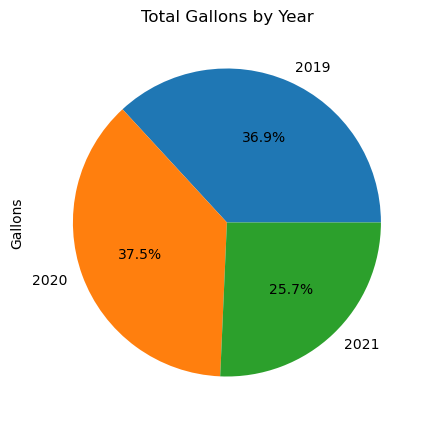

In [22]:
# graph of total alcohol sales, by year
plt = df.groupby(['Year'])['Gallons'].sum()
plt.plot(kind='pie', title='Total Gallons by Year', ylabel='Gallons',
         xlabel='Year', figsize=(8, 5), autopct='%1.1f%%')

print(plt.plot)

### This pie chart shows the percentage of the total gallons sold each year; I felt this format showcased the difference between the years better than a bar or line graph could. Notice that 2019 and 2020 are at least 10% higher than 2021. Given that Covid struck mostly in 2020, I can understand why so many gallons were sold; I'm sure that drinking was at an all time high since people were stuck isolating for months. What I find odd about this data is that it went down so low in 2021 to 25.7%. I think that further analysis would lead to some interesting conclusions.

                        totalgallons
State         Beverage              
Alaska        beer          37252942
              spirits        4950315
              wine           6335066
Colorado      beer         332544821
              spirits       39485276
              wine          48630959
Connecticut   beer         142605012
              spirits       21816212
              wine          36419149
Delaware      beer          55332224
              spirits       10735660
              wine          12667754
Florida       beer        1146498138
              spirits      138212463
              wine         213717423
Illinois      beer         659530524
              spirits       60702925
              wine         101120075
Kentucky      beer         200501949
              spirits       23301382
              wine          18139042
Massachusetts beer         306177251
              spirits       43854441
              wine          73098231
Minnesota     beer         313233721
 

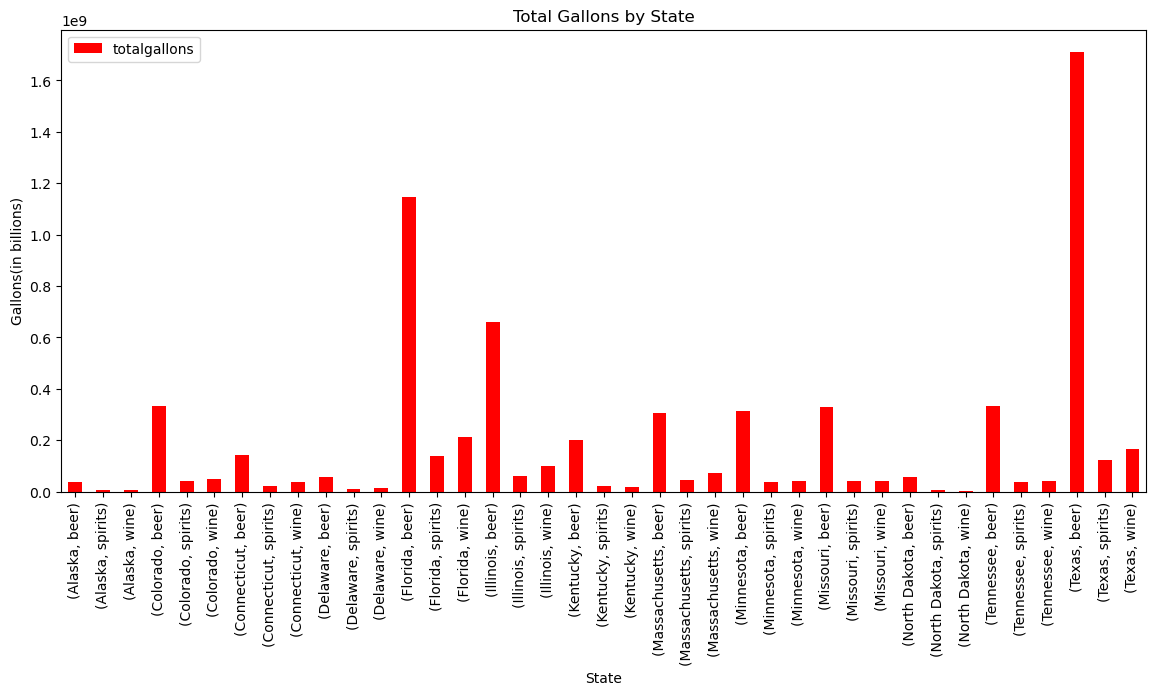

In [38]:
#graph that shows the total gallons grouped by state and type of beverage

gallons_state_beverage = df.groupby(['State','Beverage']) \
.agg(totalgallons = ('Gallons', 'sum'))

print(gallons_state_beverage)

gallons_state_beverage.plot(kind='bar', title='Total Gallons by State', ylabel='Gallons(in billions)',
         xlabel='State', figsize=(14, 6), color='red')

print(gallons_state_beverage.plot)

### This bar graph shows the total gallons of each beverage type, filtered by state. I wanted to find the difference in sales between the beverage types because I felt like it would be illuminating. For example, in Florida and Texas, the two states that had the majority of the gallons in the earlier graph, we can see that most of that is beer sales. In most states, beer makes up the majority of sales, with spirits and wine tending to be about the same per state. The US is still a very beer-centric country.